<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        U.S ACCIDENTS
    </h2>
    </div>

**About Dataset**

**Description**

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit here.

**Acknowledgements**

If you use this dataset, please kindly cite the following papers:

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

**Content**

This dataset was collected in real-time using multiple Traffic APIs. It contains accident data collected from February 2016 to March 2023 for the Contiguous United States. For more details about this dataset, please visit [here].

**Inspiration**

The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.

**Sampled Data (New!)**

For those requiring a smaller, more manageable dataset, a sampled version is available which includes 500,000 accidents. This sample is extracted from the original dataset for easier handling and analysis.

**Other Details**

Please note that the dataset may be missing data for certain days, which could be due to network connectivity issues during data collection. Regrettably, the dataset will no longer be updated, and this version should be considered the latest.

**Usage Policy and Legal Disclaimer**

This dataset is being distributed solely for research purposes under the Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By downloading the dataset, you agree to use it only for non-commercial, research, or academic applications. If you use this dataset, it is necessary to cite the papers mentioned above.


In [1]:
# Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"D:\Project\US_accident\US_Accidents_March23.csv")
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(7728394, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
numeric_df = df.select_dtypes(include=['number']).columns
len(numeric_df)

13

## Looking for missing values

In [10]:
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

Percentage of missing values

In [54]:
# see are the missing value by Percentage
missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Start_Time                9.616047
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
No_Exit                   0.000000
Traffic_Signal            0.000000
Traffic_Calming     

<Axes: >

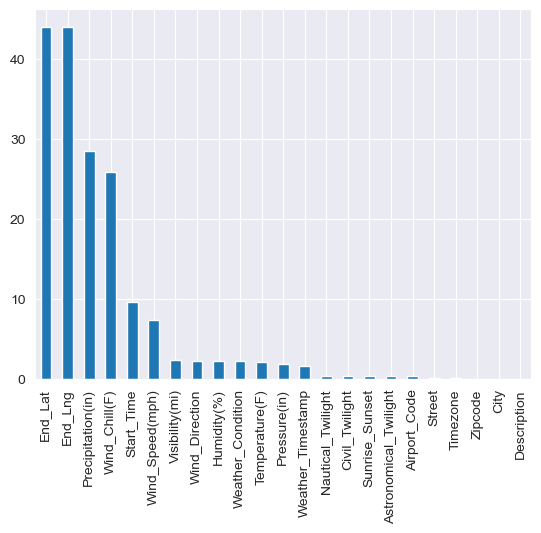

In [56]:
missing_percentage[missing_percentage != 0].plot(kind="bar")

## Exploratory Analysis and Visulisation

### Dataset Column Analysis

### 1. City Column

In [14]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [15]:
cities=df.City.value_counts()
len(cities)

13678

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [17]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: xlabel='City'>

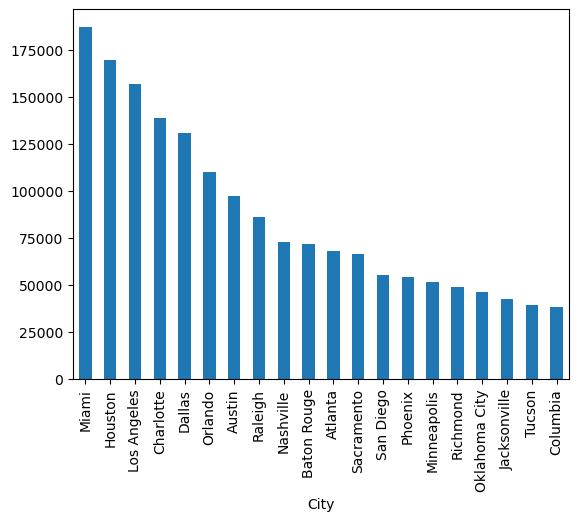

In [19]:
cities_by_accident[:20].plot(kind='bar')

In [20]:
dg=pd.DataFrame(cities_by_accident)
dg

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
...,...
Benkelman,1
Old Appleton,1
Wildrose,1


In [57]:
# Get the top 20 Stateswith the most accidents
accidents_by_state = df['State'].value_counts()

top_20_states = accidents_by_state.head(20)
print("Top 20 States with the Most Accidents:")
print(top_20_states)

Top 20 States with the Most Accidents:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
Name: count, dtype: int64


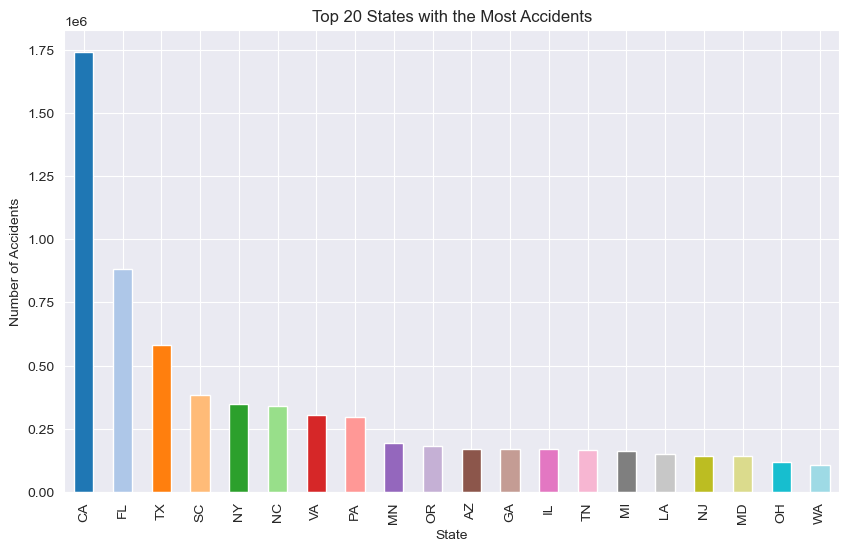

In [59]:
import matplotlib.pyplot as plt

# Assuming top_20_states is already defined
plt.figure(figsize=(10, 6))

# Define the number of bars (top_20_states length)
num_bars = len(top_20_states)

# Use a colormap directly
colors = plt.get_cmap('tab20')(range(num_bars))

# Create the bar plot
top_20_states.plot(kind='bar', color=colors)

# Add title and labels
plt.title('Top 20 States with the Most Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()

In [60]:
#Filtering the Accidents in California By City
accidents_california = df[df['State'] == 'CA']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_california = accidents_california['City'].value_counts().head(5)
accidents_by_city_california

City
Los Angeles    156491
Sacramento      66264
San Diego       55504
San Jose        34531
Riverside       26317
Name: count, dtype: int64

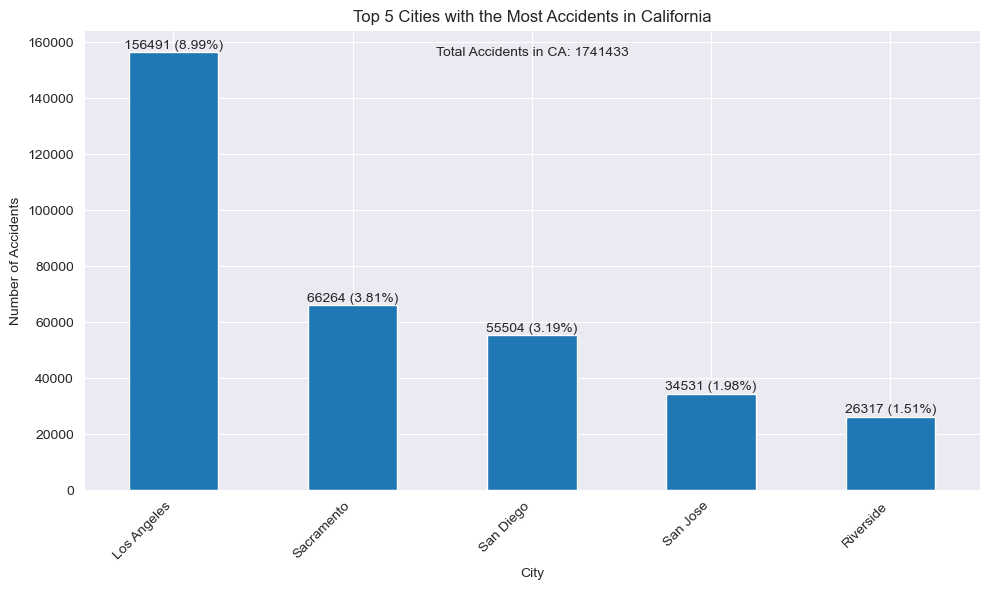

In [61]:
# Calculate the total percentage of accidents in California
total_accidents_california = len(accidents_california)
percentage_california = total_accidents_california / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_california.plot(kind='bar', color='#1F77B4')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in California')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_california):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_california * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in CA: {total_accidents_california}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [62]:
#Filtering the Accidents in Florida By City
accidents_florida = df[df['State'] == 'FL']

#Filtering the top 5 cities in California with most Accidents
accidents_by_city_florida = accidents_florida['City'].value_counts().head(5)
accidents_by_city_florida

City
Miami              186768
Orlando            109690
Jacksonville        41529
Tampa               31193
Fort Lauderdale     26205
Name: count, dtype: int64

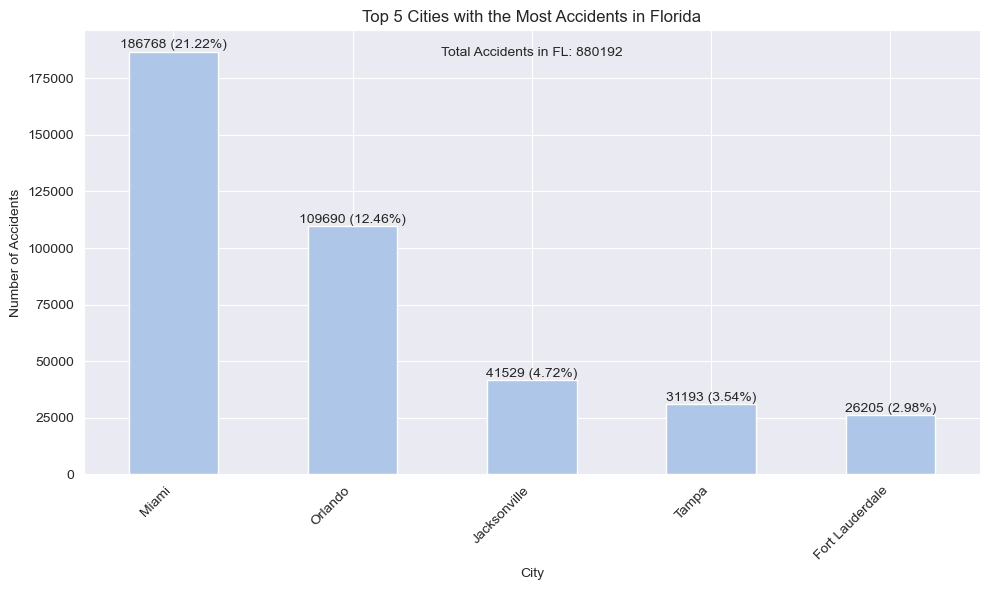

In [63]:
# Calculate the total percentage of accidents in florida
total_accidents_florida = len(accidents_florida)
percentage_florida = total_accidents_florida / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_florida.plot(kind='bar', color='#AEC7E8')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in Florida')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_florida):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_florida * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_florida}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

In [64]:
#Filtering the Accidents in Texas By City
accidents_texas = df[df['State'] == 'TX']

#Filtering the top 5 cities in Texas with most Accidents
accidents_by_city_texas = accidents_texas['City'].value_counts().head(5)
accidents_by_city_texas

City
Houston        169428
Dallas         130303
Austin          96604
San Antonio     37318
Fort Worth      19766
Name: count, dtype: int64

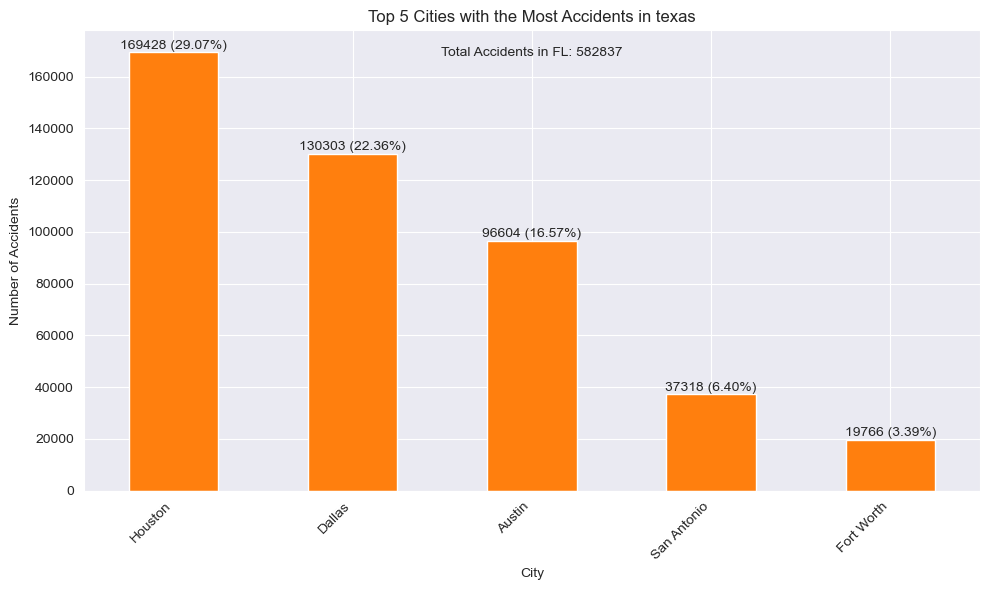

In [65]:
# Calculate the total percentage of accidents in texas
total_accidents_texas = len(accidents_texas)
percentage_texas= total_accidents_texas / len(df) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
accidents_by_city_texas.plot(kind='bar', color='#FF7F0E')



# Set the title and axis labels
plt.title('Top 5 Cities with the Most Accidents in texas')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Add the count and percentage to the label above each bar
for x, y in enumerate(accidents_by_city_texas):
    plt.text(x, y + 100, f'{y} ({(y / total_accidents_texas * 100):.2f}%)',
             ha='center', va='bottom')
    # Add the total percentage to the label
plt.text(0.5, 0.95, f'Total Accidents in FL: {total_accidents_texas}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the bar plot
plt.tight_layout()
plt.show()

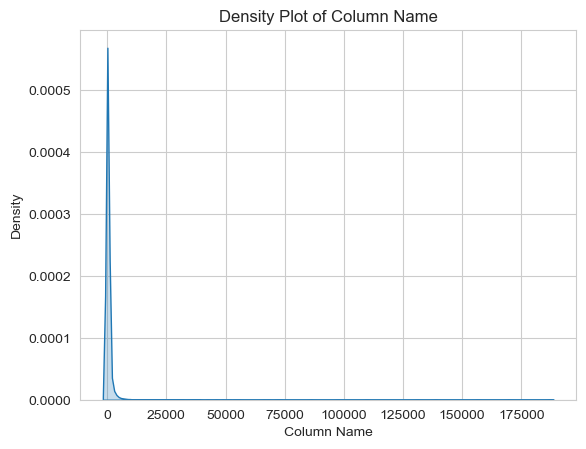

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background style of the plot
sns.set_style('whitegrid')

sns.kdeplot(dg['count'], shade=True)
plt.xlabel('Column Name')
plt.ylabel('Density')
plt.title('Density Plot of Column Name')

# Display the plot
plt.show()

In [22]:
cities_by_accident[cities_by_accident < 10]

City
Yermo                           9
Washington Crossing             9
Falfurrias                      9
Lookout Mountain                9
Clemons                         9
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 4238, dtype: int64

## 2. Severity

In [23]:
df["Severity"].value_counts() 

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [24]:
df["Severity"].value_counts()  / len(df["Severity"])

Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: count, dtype: float64

## 3. Start Time

In [25]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

<Axes: xlabel='Start_Time'>

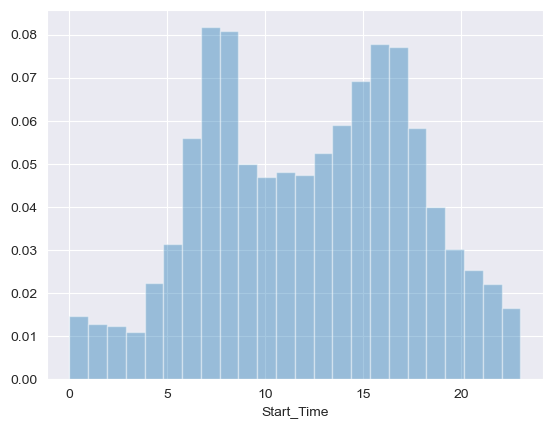

In [27]:
import seaborn as sns
sns.set_style("darkgrid")

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

1.A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

2.Next higest percentage is 3 pm to 6 pm

<Axes: xlabel='Start_Time'>

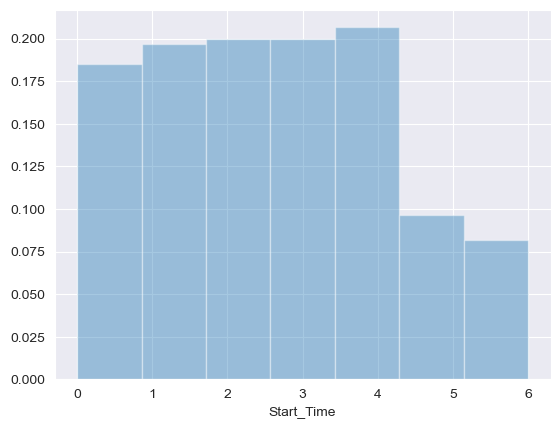

In [28]:
## Days of Week
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

#### weekdays have higher number of accidents compared to weekends

<Axes: xlabel='Start_Time'>

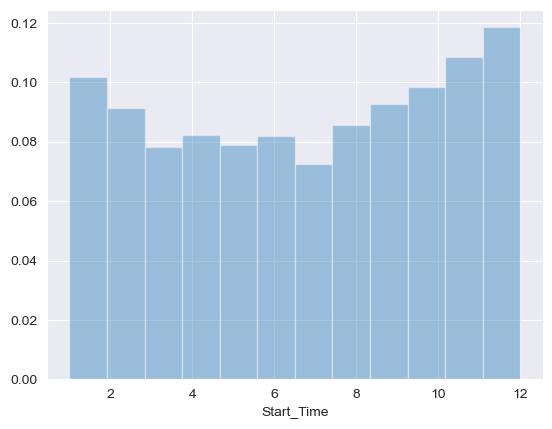

In [29]:
## Month
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<Axes: xlabel='Start_Time'>

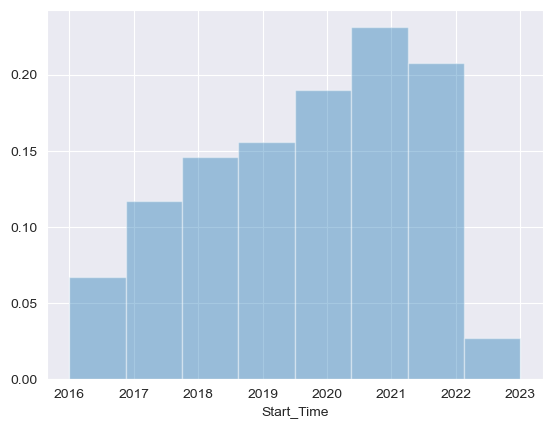

In [30]:
## Year
sns.distplot(df.Start_Time.dt.year, bins=8, kde=False, norm_hist=True)

<Axes: xlabel='Start_Time'>

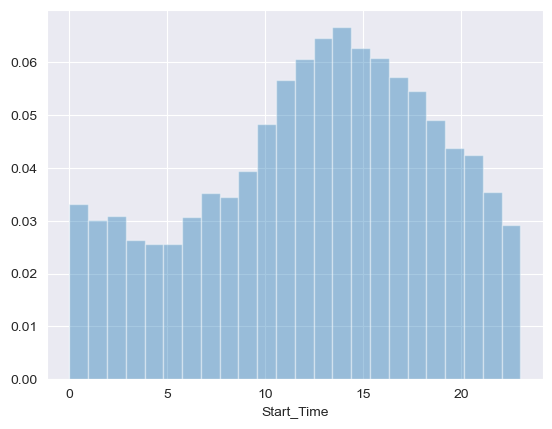

In [31]:
# Accidents distribution of Sunday

sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

#### On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

<Axes: xlabel='Start_Time'>

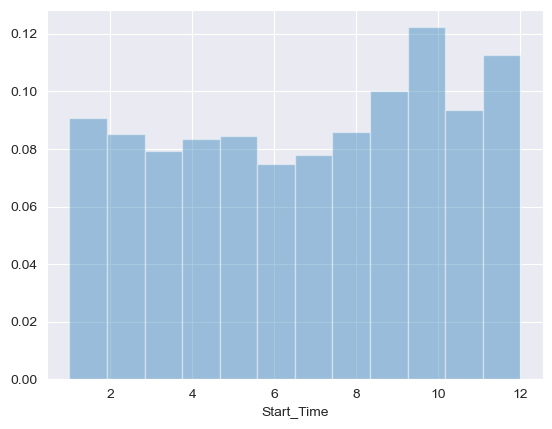

In [32]:
### Accidents distribution of Monday

df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

1.Much data is missing for 2016. Maybe even 2017.

2.There seems to be some issue with the Source 3

<Axes: ylabel='count'>

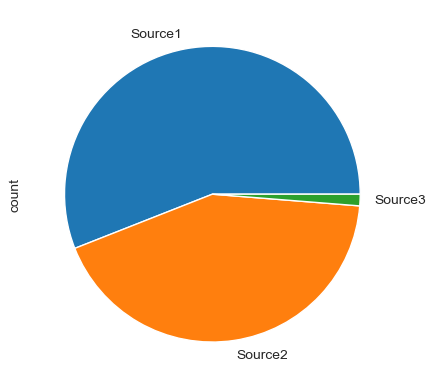

In [34]:
df.Source.value_counts().plot(kind='pie')

## 4. Start Latitude & Longitude

In [36]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [37]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

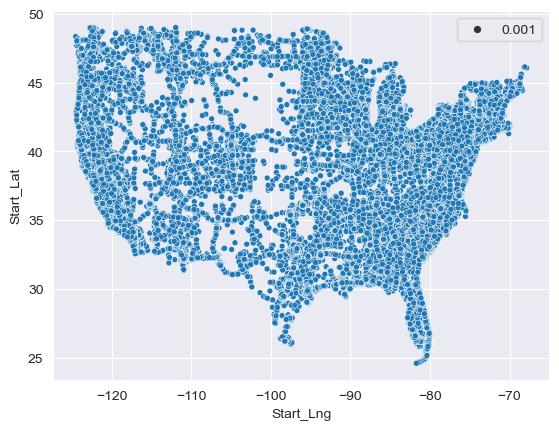

In [38]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [41]:
import folium

# Assuming df is your DataFrame
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [42]:
# Use the items() method instead of iteritems()
for index, row in df[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
    print(row)

Start_Lat    41.345287
Start_Lng   -74.190170
Name: 327684, dtype: float64
Start_Lat    37.551426
Start_Lng   -77.439522
Name: 1049631, dtype: float64
Start_Lat    25.966740
Start_Lng   -80.294739
Name: 689549, dtype: float64
Start_Lat    33.774105
Start_Lng   -84.314545
Name: 2621160, dtype: float64
Start_Lat    39.074512
Start_Lng   -76.543190
Name: 3288781, dtype: float64
Start_Lat    39.916496
Start_Lng   -76.739281
Name: 3023943, dtype: float64
Start_Lat     37.373352
Start_Lng   -121.925731
Name: 7071930, dtype: float64
Start_Lat    33.976638
Start_Lng   -80.933613
Name: 4111919, dtype: float64
Start_Lat     34.148920
Start_Lng   -118.157112
Name: 7677277, dtype: float64
Start_Lat    40.106846
Start_Lng   -75.123871
Name: 248416, dtype: float64
Start_Lat    26.017377
Start_Lng   -80.212905
Name: 3562436, dtype: float64
Start_Lat    25.886911
Start_Lng   -80.125216
Name: 6186584, dtype: float64
Start_Lat    33.973900
Start_Lng   -81.156441
Name: 1119807, dtype: float64
Start_Lat  

In [43]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [44]:
from folium.plugins import HeatMap

sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# 5. Source

In [46]:
df.Source.value_counts()

Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

# 6. Period of day

In [47]:
df.Sunrise_Sunset.value_counts()/len(df.Sunrise_Sunset)*100

Sunrise_Sunset
Day      69.025376
Night    30.673837
Name: count, dtype: float64

# 7. Time zone

In [48]:
df.Timezone.value_counts()/len(df.Timezone)*100

Timezone
US/Eastern     46.324851
US/Pacific     26.693567
US/Central     21.293117
US/Mountain     5.587435
Name: count, dtype: float64

# 8. Weather Condition

In [49]:
df.Weather_Condition.value_counts()/len(df.Weather_Condition)*100

Weather_Condition
Fair                         33.134983
Mostly Cloudy                13.148851
Cloudy                       10.572468
Clear                        10.464567
Partly Cloudy                 9.044208
                               ...    
Heavy Sleet / Windy           0.000013
Sand / Windy                  0.000013
Heavy Rain Shower / Windy     0.000013
Blowing Snow Nearby           0.000013
Drifting Snow                 0.000013
Name: count, Length: 144, dtype: float64

# 9. Crossing

In [50]:
df.Crossing.value_counts()/len(df.Crossing)*100

Crossing
False    88.694119
True     11.305881
Name: count, dtype: float64

# 10. Traffic Signal

In [51]:
df.Traffic_Signal.value_counts()/len(df.Traffic_Signal)*100

Traffic_Signal
False    85.200392
True     14.799608
Name: count, dtype: float64

# 11.Temperature

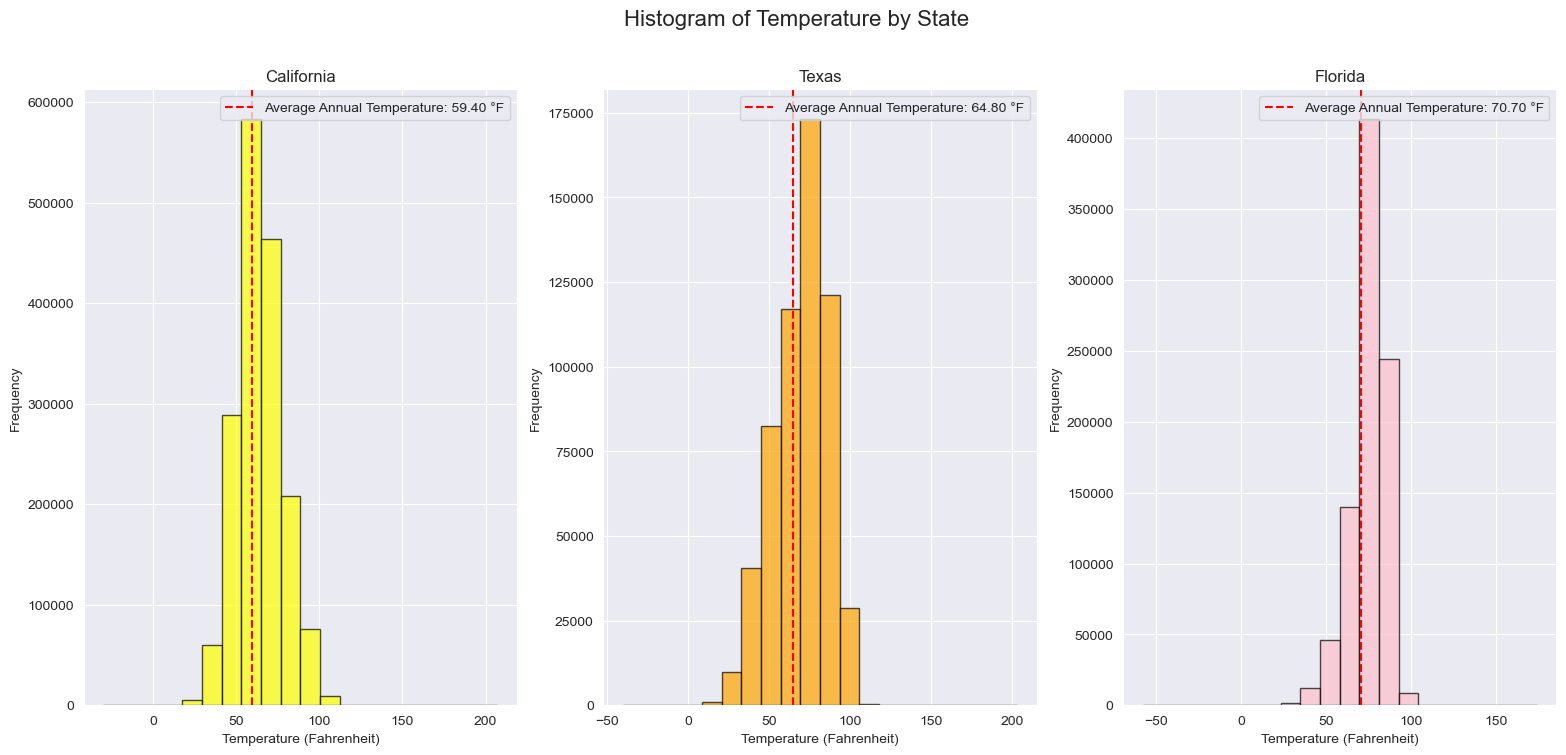

In [69]:
# Filter data for California, Texas, and Florida
california_data = df[df['State'] == 'CA']['Temperature(F)'].dropna()
texas_data = df[df['State'] == 'TX']['Temperature(F)'].dropna()
florida_data = df[df['State'] == 'FL']['Temperature(F)'].dropna()

# Calculate mean temperatures for each state
california_mean_temp = 59.4
texas_mean_temp = 64.8
florida_mean_temp = 70.7

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='yellow', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {california_mean_temp:.2f} °F')
axes[0].set_title('California')
axes[0].set_xlabel('Temperature (Fahrenheit)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {texas_mean_temp:.2f} °F')
axes[1].set_title('Texas')
axes[1].set_xlabel('Temperature (Fahrenheit)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='pink', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Average Annual Temperature: {florida_mean_temp:.2f} °F')
axes[2].set_title('Florida')
axes[2].set_xlabel('Temperature (Fahrenheit)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Temperature by State', fontsize=16)

plt.show()

# 12.Humidity

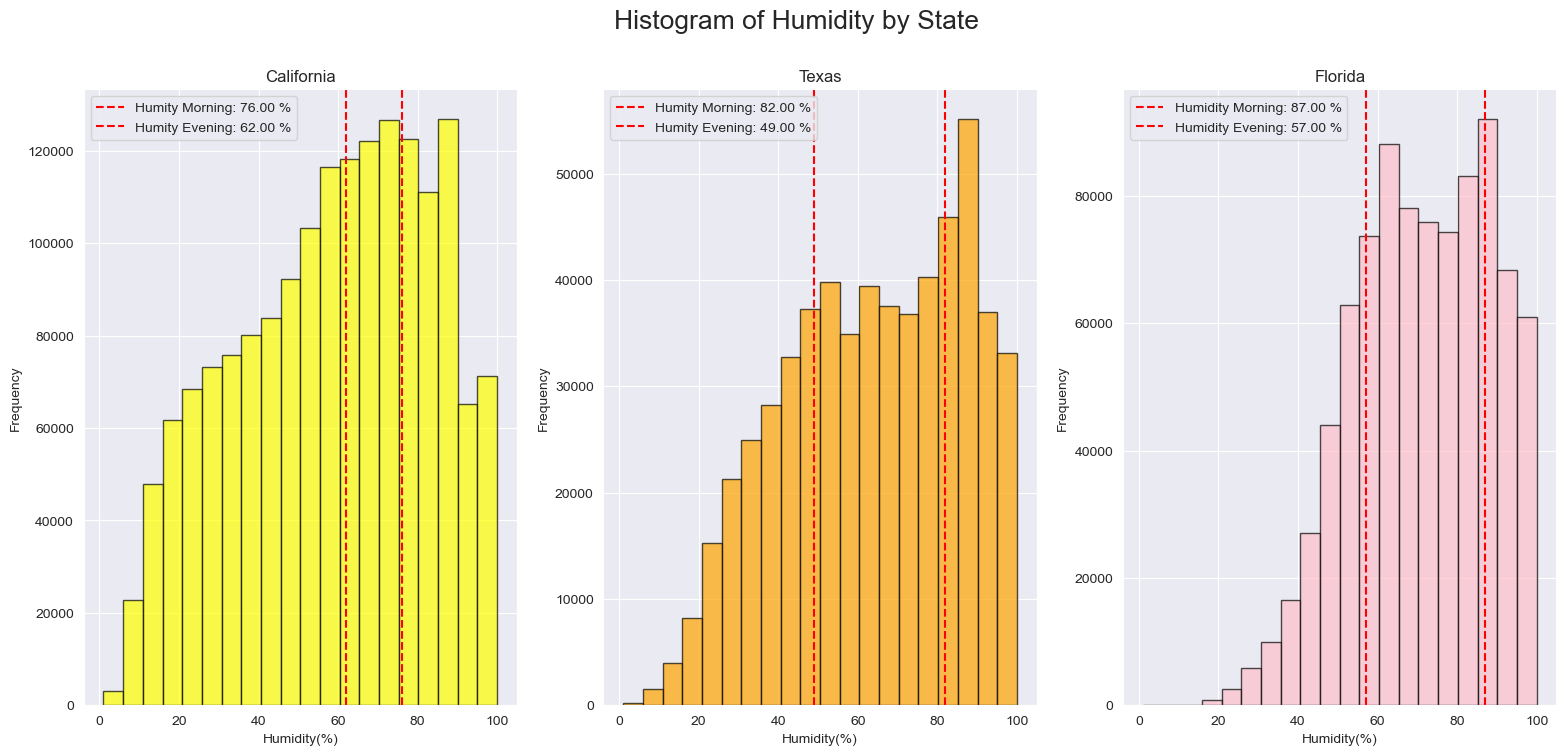

In [70]:
# Filter data for California, Texas, and Florida
california_data = df[df['State'] == 'CA']['Humidity(%)'].dropna()
texas_data = df[df['State'] == 'TX']['Humidity(%)'].dropna()
florida_data = df[df['State'] == 'FL']['Humidity(%)'].dropna()

# Calculate mean temperatures for each state
california_mean_humity_morning = 76
california_mean_humity_night = 62
texas_mean_humity_morning = 82
texas_mean_humity_night = 49
florida_mean_humity_morning = 87
florida_mean_humity_night = 57

# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

# California
axes[0].hist(california_data, bins=20, color='yellow', edgecolor='black', alpha=0.7)
axes[0].axvline(california_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {california_mean_humity_morning:.2f} %')
axes[0].axvline(california_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {california_mean_humity_night:.2f} %')
axes[0].set_title('California')
axes[0].set_xlabel('Humidity(%)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Texas
axes[1].hist(texas_data, bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1].axvline(texas_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humity Morning: {texas_mean_humity_morning:.2f} %')
axes[1].axvline(texas_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humity Evening: {texas_mean_humity_night:.2f} %')
axes[1].set_title('Texas')
axes[1].set_xlabel('Humidity(%)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Florida
axes[2].hist(florida_data, bins=20, color='pink', edgecolor='black', alpha=0.7)
axes[2].axvline(florida_mean_humity_morning, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Morning: {florida_mean_humity_morning:.2f} %')
axes[2].axvline(florida_mean_humity_night, color='red', linestyle='--', linewidth=1.5, label=f'Humidity Evening: {florida_mean_humity_night:.2f} %')
axes[2].set_title('Florida')
axes[2].set_xlabel('Humidity(%)')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.suptitle('Histogram of Humidity by State', fontsize=19)

plt.show()

# 13.Weather condition

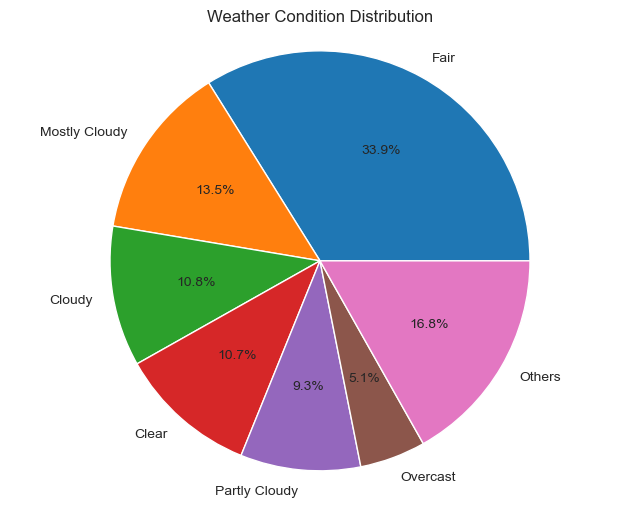

In [71]:
# Graph the Weather conditions in a Pie Chart
weather_counts = df['Weather_Condition'].value_counts()

# Group the main categories of weather conditions
top_conditions = weather_counts.head(6)
other_conditions_count = weather_counts.iloc[6:].sum()

# Create a new DataFrame with the summarized weather conditions
summary_weather_counts = pd.DataFrame(top_conditions).reset_index()
summary_weather_counts.columns = ['Weather_Condition', 'Count']

others_row = pd.DataFrame({'Weather_Condition': ['Others'], 'Count': [other_conditions_count]})
summary_weather_counts = pd.concat([summary_weather_counts, others_row], ignore_index=True)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(summary_weather_counts['Count'], labels=summary_weather_counts['Weather_Condition'], autopct='%1.1f%%')
plt.title('Weather Condition Distribution')
plt.axis('equal')
plt.show()

# 14.Traffic nature

This section aims to uncover patterns based on traffic characteristics, such as identifying situations where accidents are more prevalent, such as at traffic signals, crossings, junctions, and stops. The analysis then delves into the specificities of the three previously studied states (California, Texas, and Florida) to discern any differences.

In [72]:
#Convert Booleans Columns into binary 
# List of boolean columns
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
                   'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
                   'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df[boolean_columns] = df[boolean_columns].astype(int)

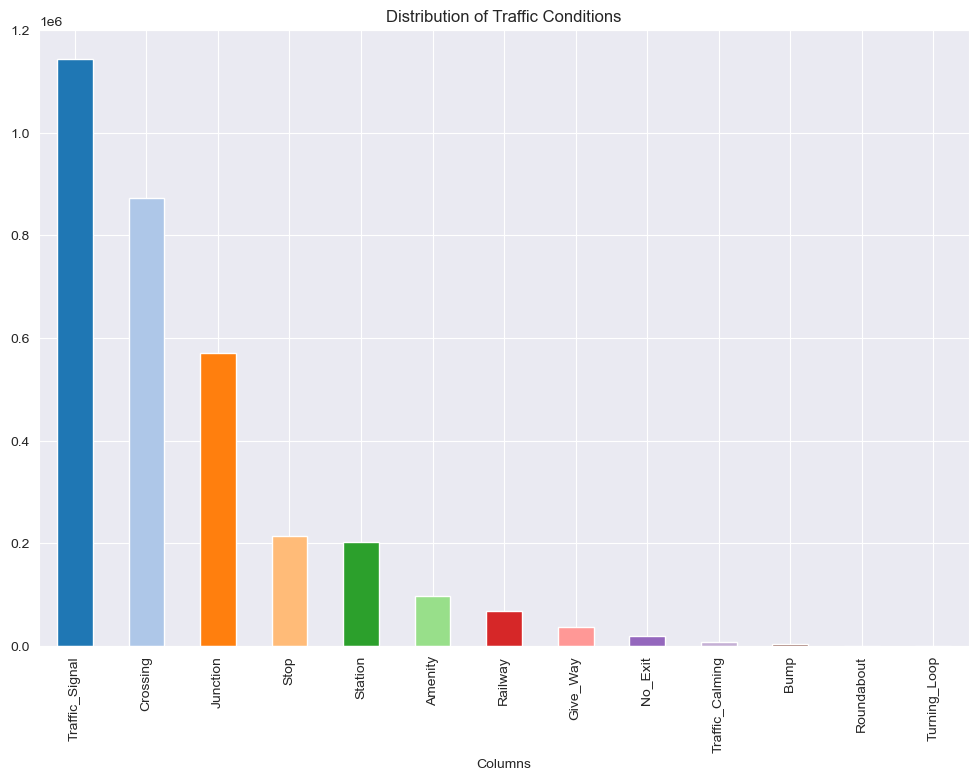

In [74]:
# Calculate the number of bars (columns)
num_bars = len(df[boolean_columns].sum().sort_values(ascending=False))

# Use a color map dynamically for the number of bars
colors = plt.get_cmap('tab20')(range(num_bars))

# Plot the histogram
plt.figure(figsize=(12, 8))
df[boolean_columns].sum().sort_values(ascending=False).plot(kind='bar', color=colors)

plt.title('Distribution of Traffic Conditions')
plt.xlabel('Columns')
plt.show()

# Summary and Conclusion

## Insights

1.Source of raw accident data :- Source 1(56%) & Source 2(43%)

2.80% of accidents are of 2nd level Severity

3.Less than 5% of cities have more than 1000 yearly accidents.

4.Over one third of cities have less than 10 accidents

5.Over 1200 cities have reported just one accident (need to investigate)

6.The number of accidents per city decreases exponentially

7.weekdays have higher number of accidents compared to weekends

8.Period of day :- Day(69%) & Night(31%)

9.Timezone based on the location of the accident :- US/Eastern(46%) & US/Pacific(27%)

10.Weather condition (rain, snow, thunderstorm, fog, etc.) :- Fair(33%) & Mostly Cloudy(13%)

11.Presence of crossing in a nearby location:- True(11%) & False(89%)

12.Presence of traffic_signal in a nearby location:- True(15%) & False(85%)

13.A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work) Next higest percentage is 3 pm to 6 pm

14.On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

15.Weekdays have higher number of accidents compared to weekends

16.Much data is missing for 2016. Maybe even 2017.

17.There seems to be some issue with the Source 3

18.Low Accidents in Summer and Higher Accidents on Winter

19.December is the highest accident recoreded month followed by november

20.Friday have the most accidents on week